In [1]:
try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.1.0


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Input, Conv2D, Dropout, Flatten
from tensorflow.keras.models import Model

In [3]:
data = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = data.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train.shape:",x_train.shape)
K = len(set(y_train))
print("No of classes:", K)

x_train.shape: (60000, 28, 28, 1)
No of classes: 10


In [0]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), activation='relu', strides=2)(i)
x = Conv2D(64, (3,3), activation='relu', strides=2)(x)
x = Conv2D(128, (3,3), activation='relu', strides=2)(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)
model = Model(i,x)


In [5]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 134us/sample - loss: 0.5248 - accuracy: 0.8068 - val_loss: 0.4052 - val_accuracy: 0.8495
Epoch 2/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.3613 - accuracy: 0.8654 - val_loss: 0.3505 - val_accuracy: 0.8698
Epoch 3/10
60000/60000 [==============================] - 6s 102us/sample - loss: 0.3156 - accuracy: 0.8812 - val_loss: 0.3294 - val_accuracy: 0.8792
Epoch 4/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2807 - accuracy: 0.8938 - val_loss: 0.3242 - val_accuracy: 0.8782
Epoch 5/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.2554 - accuracy: 0.9036 - val_loss: 0.3029 - val_accuracy: 0.8924
Epoch 6/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.2345 - accuracy: 0.9104 - val_loss: 0.2872 - val_accuracy: 0.8969
Epoch 7/10
60000/60000 [==========================

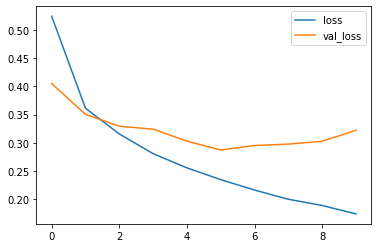

In [6]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

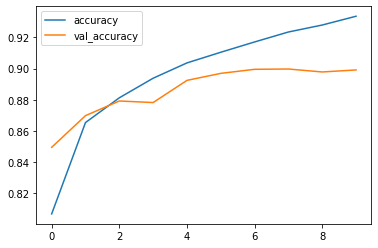

In [7]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

Confusion matrix, not normalized
[[849   3  21  13   2   1 104   0   7   0]
 [  3 973   0  15   4   0   4   0   1   0]
 [ 21   0 862   9  37   0  69   0   2   0]
 [ 12   9  19 894  35   2  28   0   1   0]
 [  2   1  67  13 822   0  94   0   1   0]
 [  0   0   0   1   0 978   0  13   0   8]
 [109   2  75  26  65   0 713   0  10   0]
 [  0   0   0   0   0  13   0 970   0  17]
 [  6   1   6   1   6   2   2   1 973   2]
 [  0   0   0   0   0   6   1  36   0 957]]


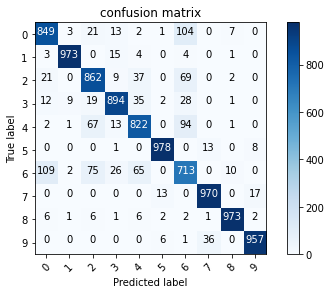

In [11]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title='confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, not normalized")
  print(cm)
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
       plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment='center',
             color='white' if cm[i,j]> thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [0]:
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Skirt
Sneaker
Bag
Ankle Boot'''.split('\n')


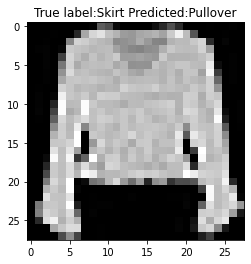

In [33]:
misclassified_idx = np.where(p_test!= y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
plt.title("True label:{} Predicted:{}".format(labels[y_test[i]], labels[p_test[i]]));